### Part 1 : Voronoi mesh generation

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import geopandas as gpd
from mf6Voronoi.geoVoronoi import createVoronoi
from mf6Voronoi.geoUtils import plotOrgDistPoints, plotCirclesPoints, plotKeyList

In [2]:
#Create mesh object specifying the coarse mesh and the multiplier
vorMesh = createVoronoi(meshName='regionalModel',maxRef = 500, multiplier=1.5)

#Open limit layers and refinement definition layers
vorMesh.addLimit('basin','../../examples/regionalModel/shp/Angascancha_Basin_Extension.shp')
vorMesh.addLayer('river','../../examples/regionalModel/shp/rios.shp',50)


In [3]:
#Generate point pair array
vorMesh.generateOrgDistVertices()

#Generate the point cloud and voronoi
vorMesh.createPointCloud()
vorMesh.generateVoronoi()



/--------Layer river discretization-------/
Progressive cell size list: [50, 125.0, 237.5, 406.25] m.

/----Sumary of points for voronoi meshing----/
Distributed points from layers: 1
Points from layer buffers: 10872
Points from max refinement areas: 475
Points from min refinement areas: 0
Total points inside the limit: 14713
/--------------------------------------------/

Time required for point generation: 9.92 seconds 


/----Generation of the voronoi mesh----/

Time required for voronoi generation: 0.61 seconds 



In [4]:

#Export generated voronoi mesh
vorMesh.getVoronoiAsShp(outputPath='output')


/----Generation of the voronoi shapefile----/
The output folder output exists

Time required for voronoi shapefile: 14.09 seconds 



In [5]:
#Export point data and voronoi polygons

outPath = 'output'
#Points
# vorMesh.getPointsAsShp('vertexOrg',outPath+'/vertexOrg.shp')
#vorMesh.getPointsAsShp('vertexDist',outPath+'/vertexDist.shp')
# vorMesh.getPointsAsShp('vertexBuffer',outPath+'/vertexBuffer.shp')
# vorMesh.getPointsAsShp('vertexMaxRef',outPath+'/vertexMaxRef.shp')
# vorMesh.getPointsAsShp('vertexMinRef',outPath+'/vertexMinRef.shp')
# vorMesh.getPointsAsShp('vertexTotal',outPath+'/vertexTotal.shp')
#Polygons

#vorMesh.getPolyAsShp('voronoiRegions',outPath+'/voronoiRegions.shp')


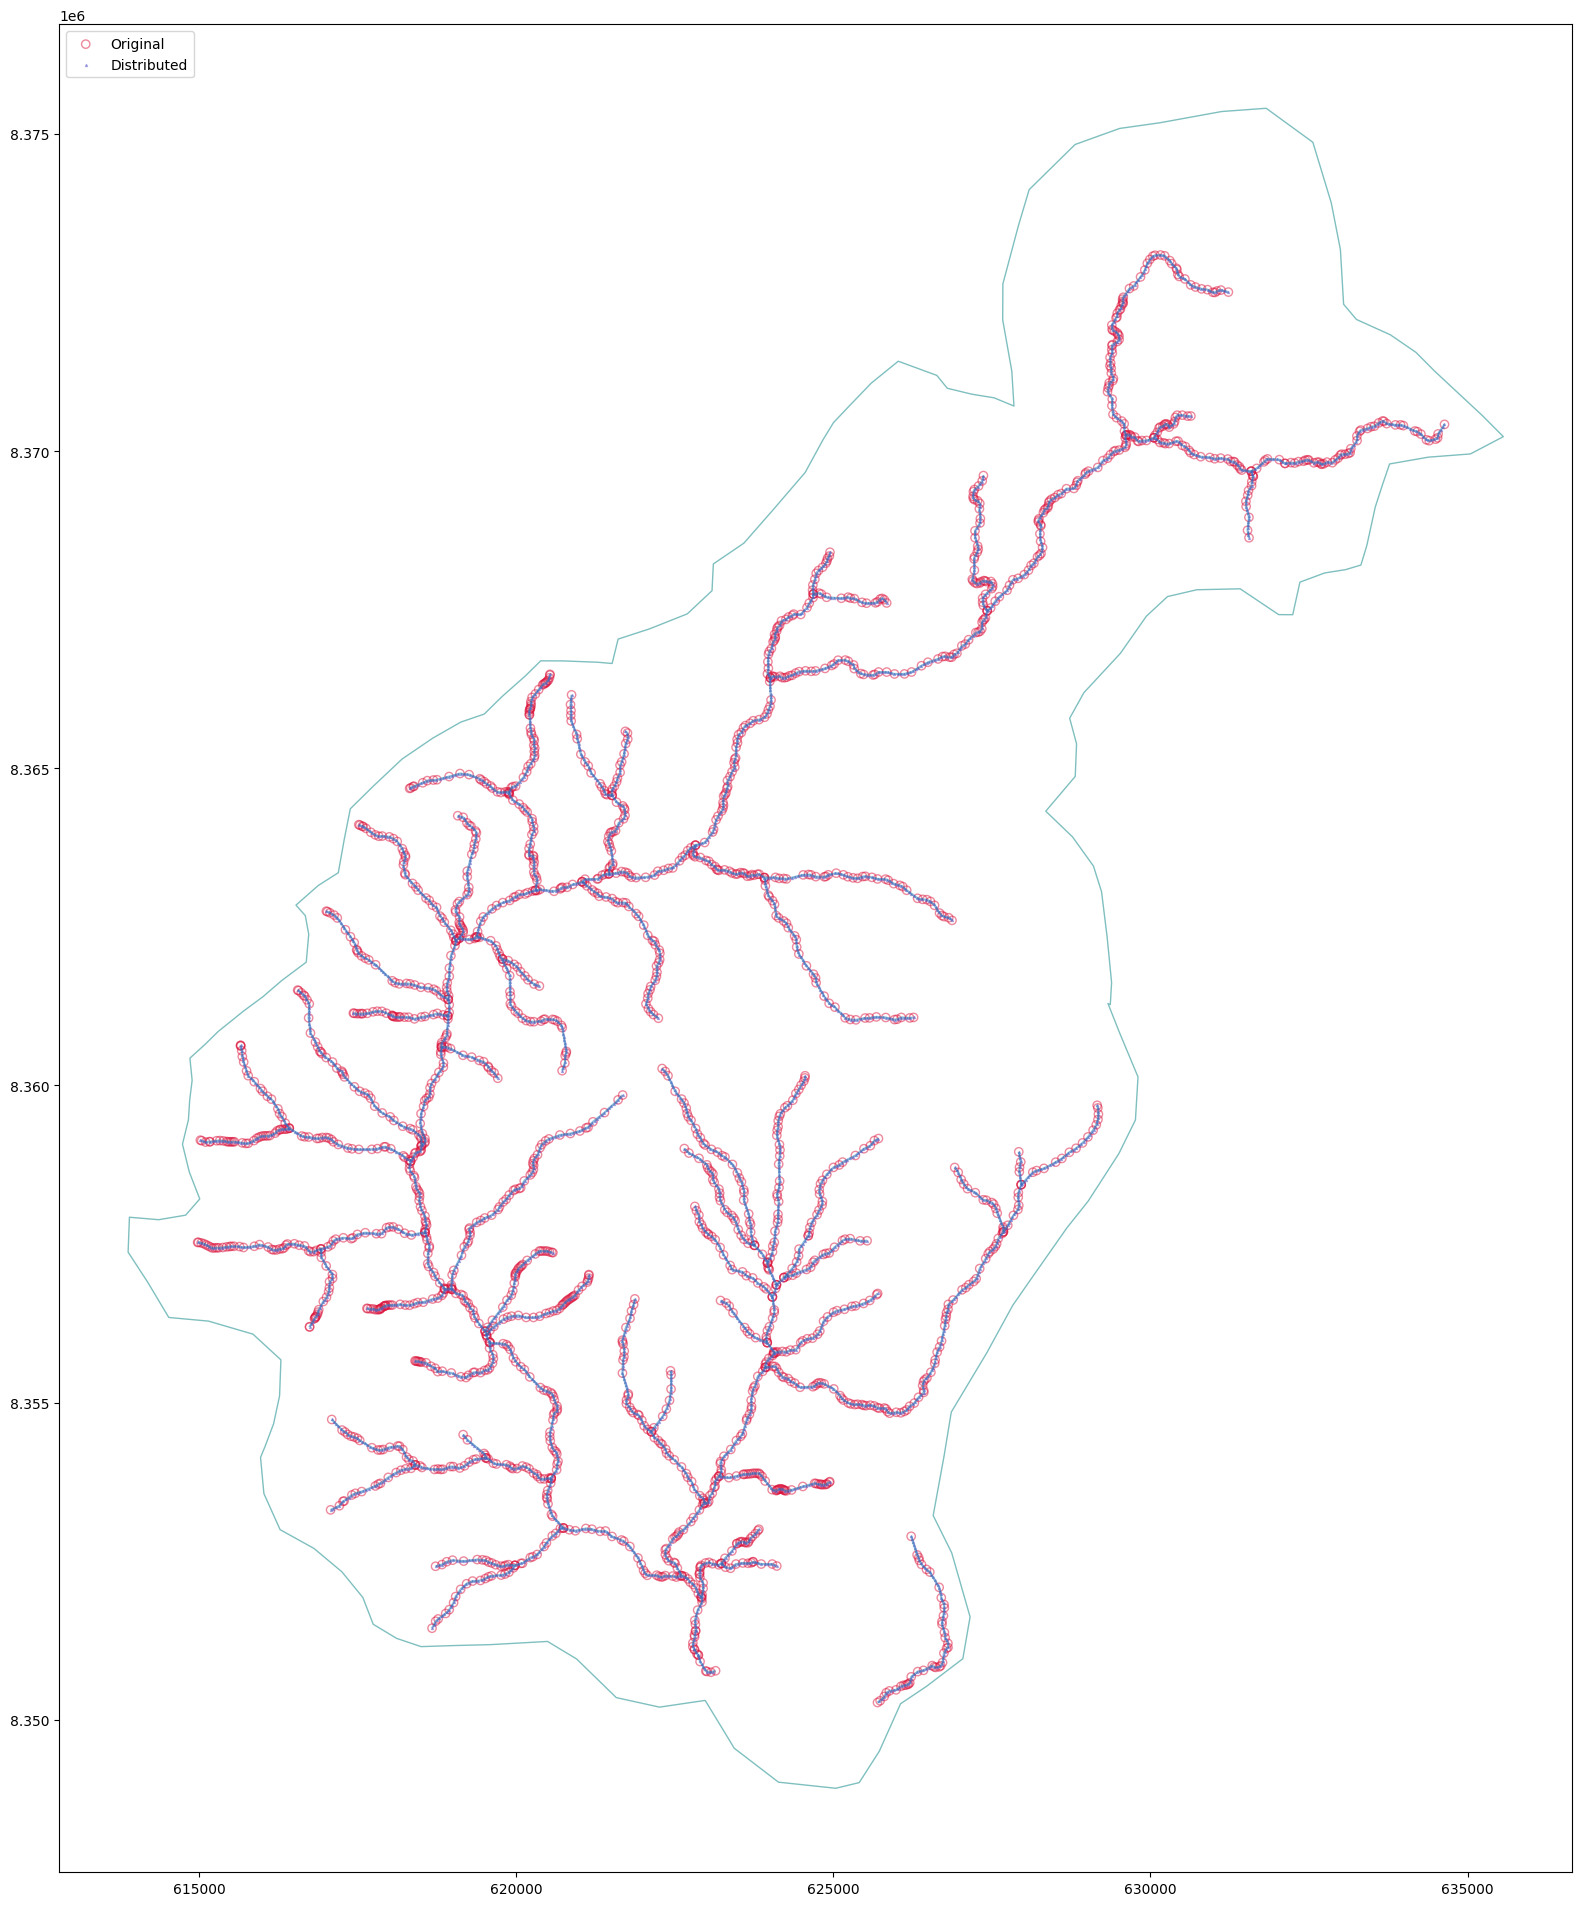

In [6]:
plotOrgDistPoints(vorMesh)

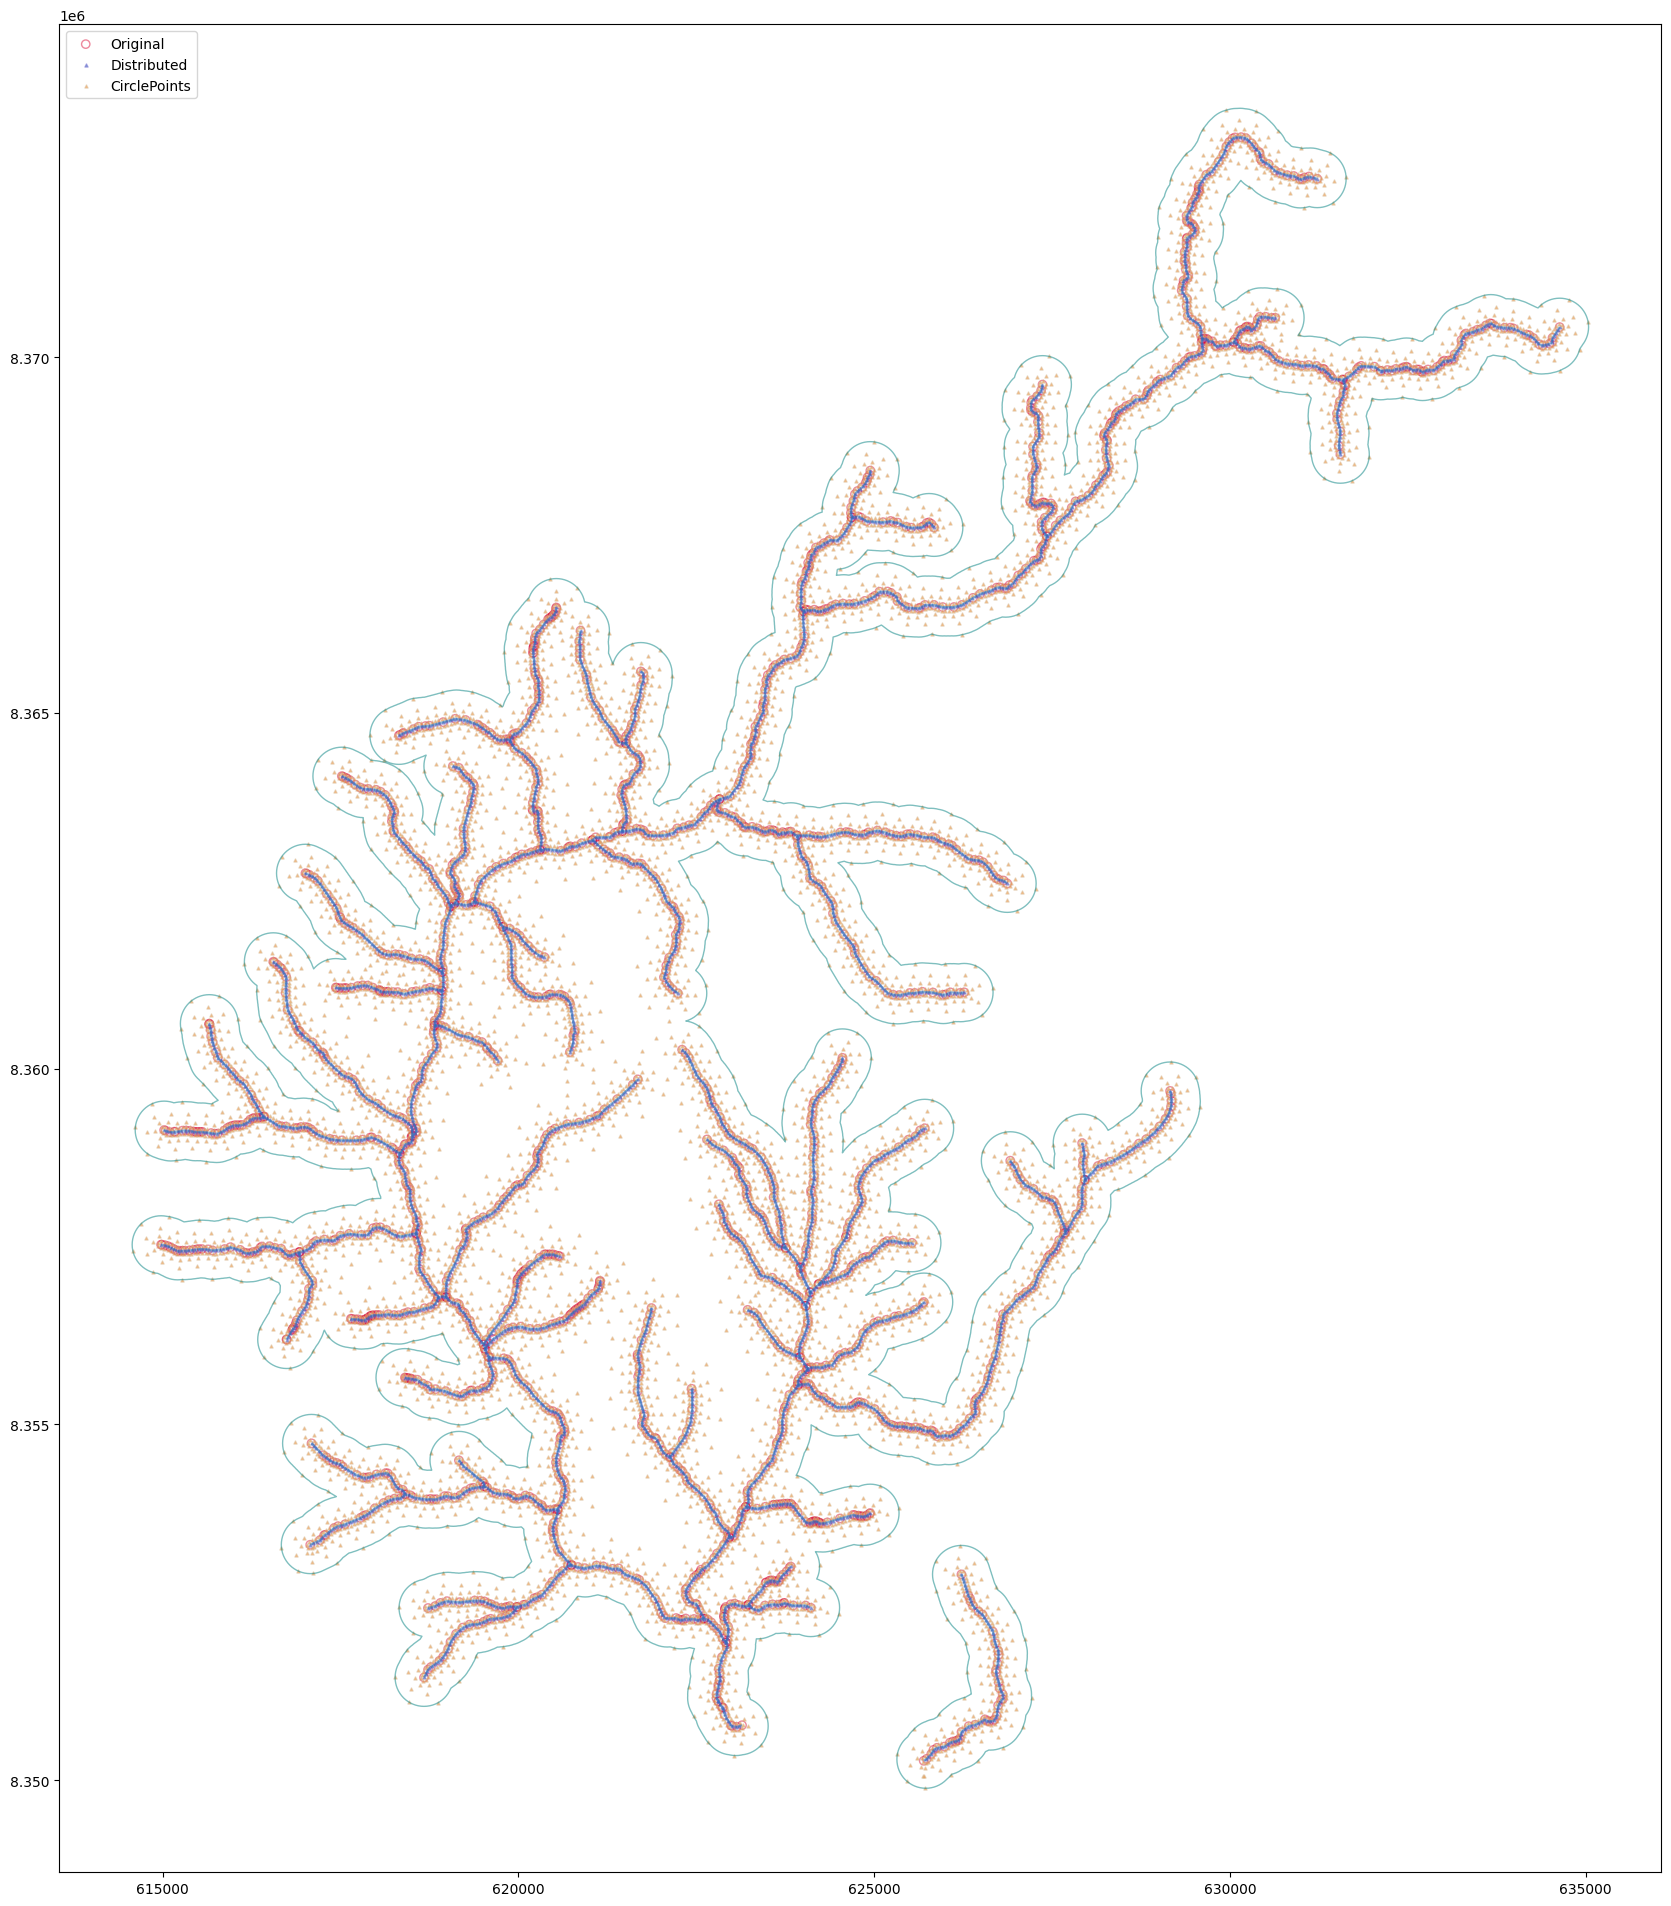

In [7]:
plotCirclesPoints(vorMesh)

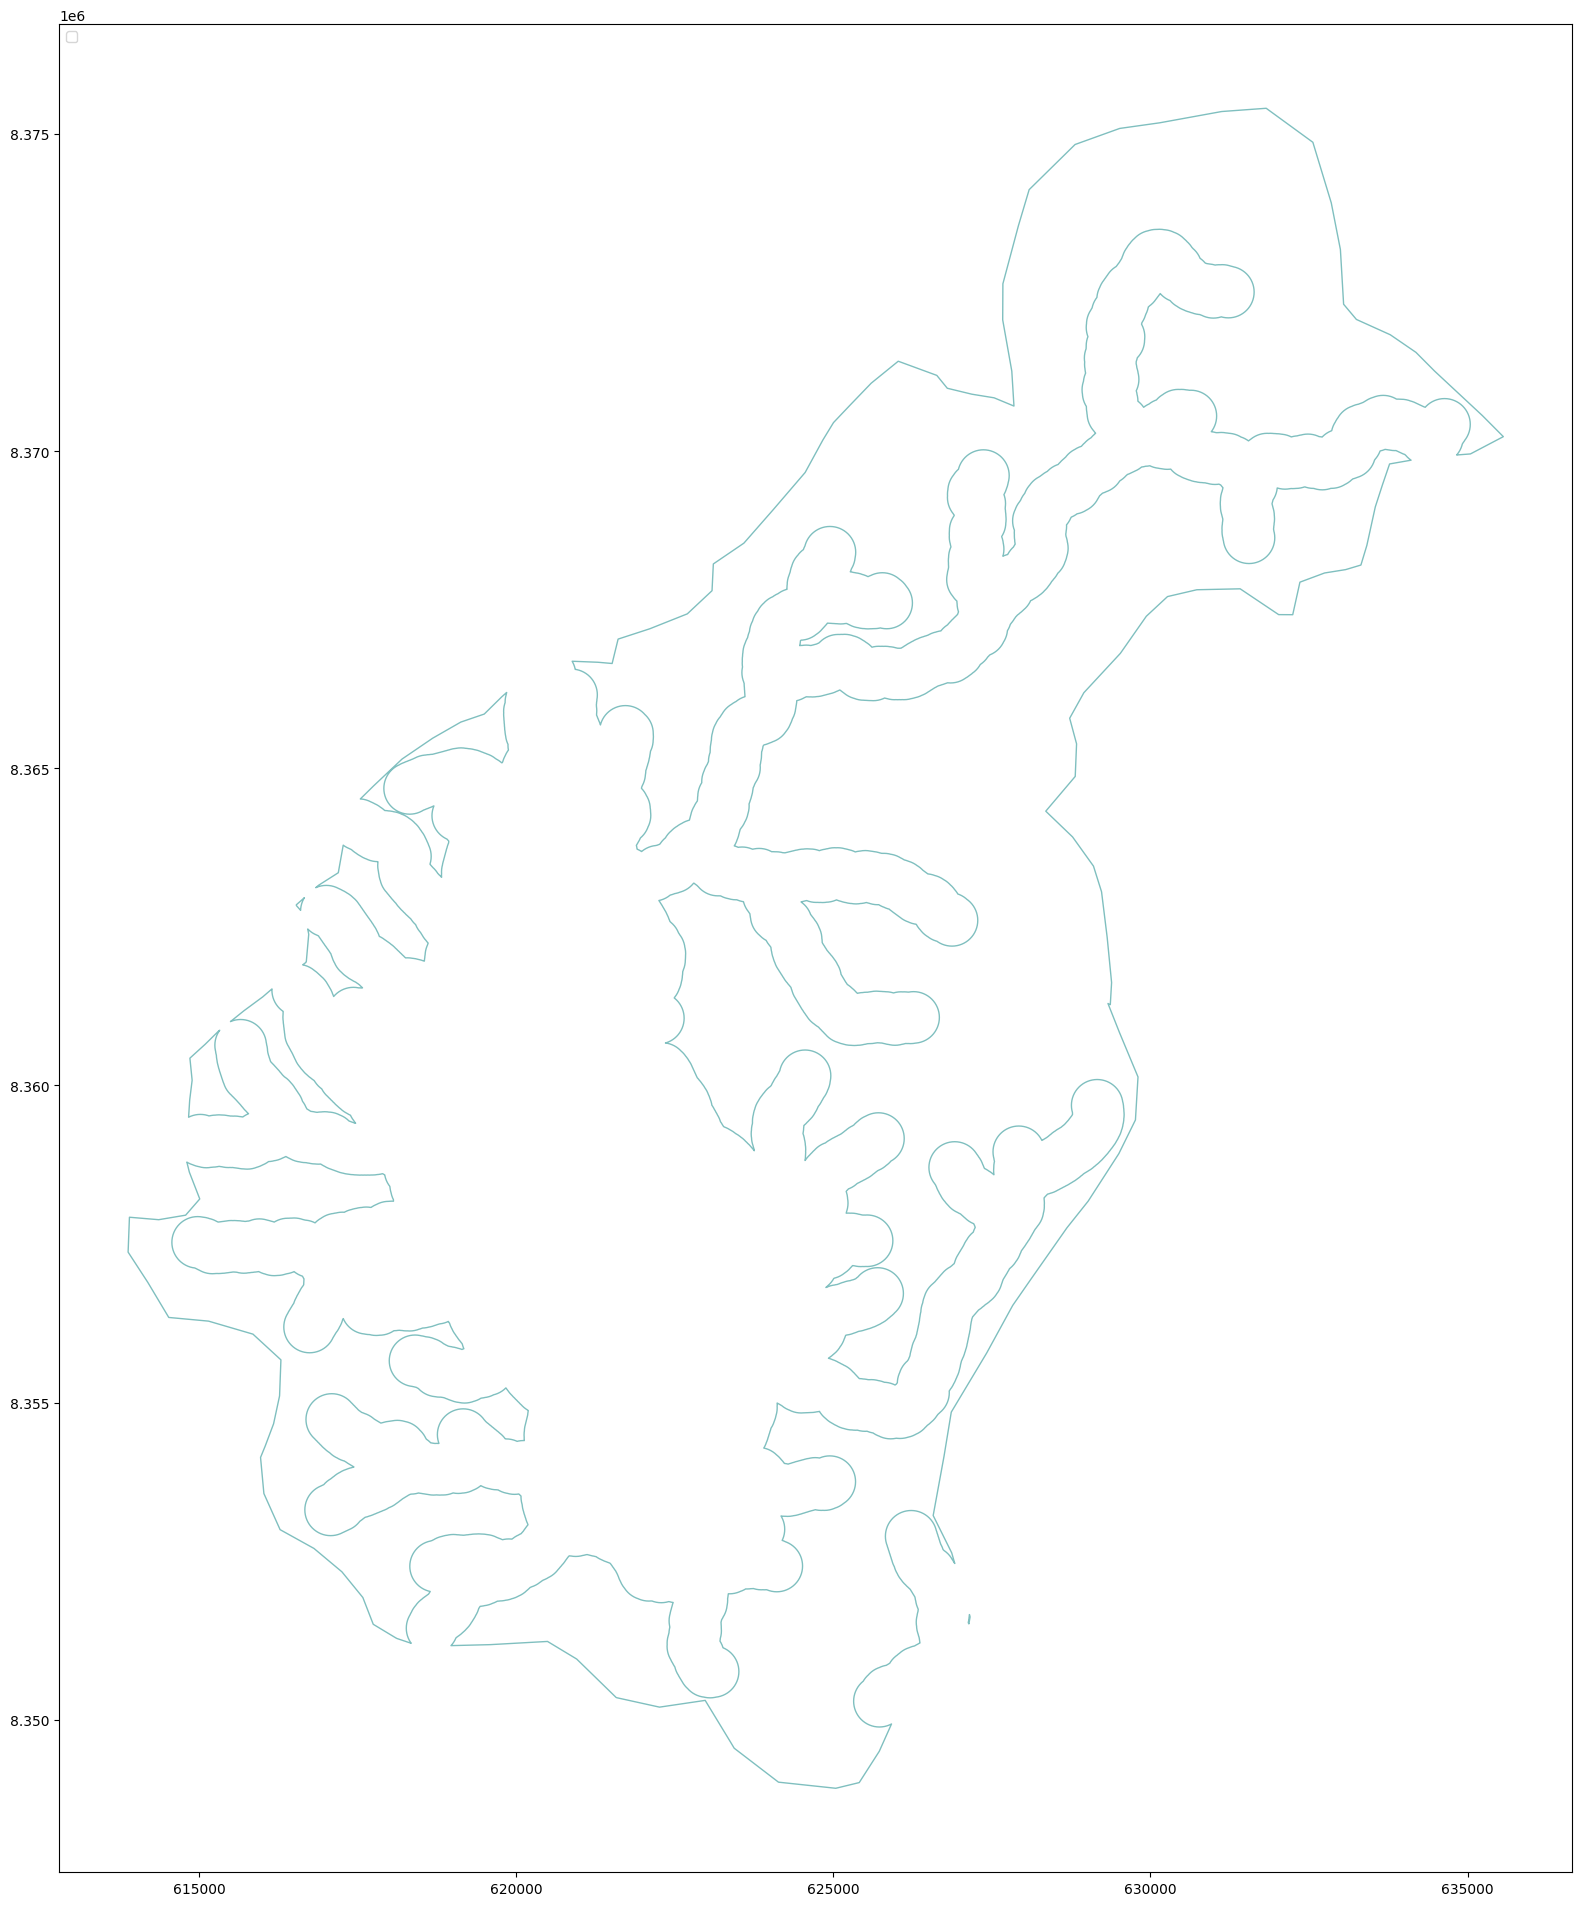

In [8]:
plotKeyList(vorMesh, ['pointsMaxRefPoly'])

<Axes: >

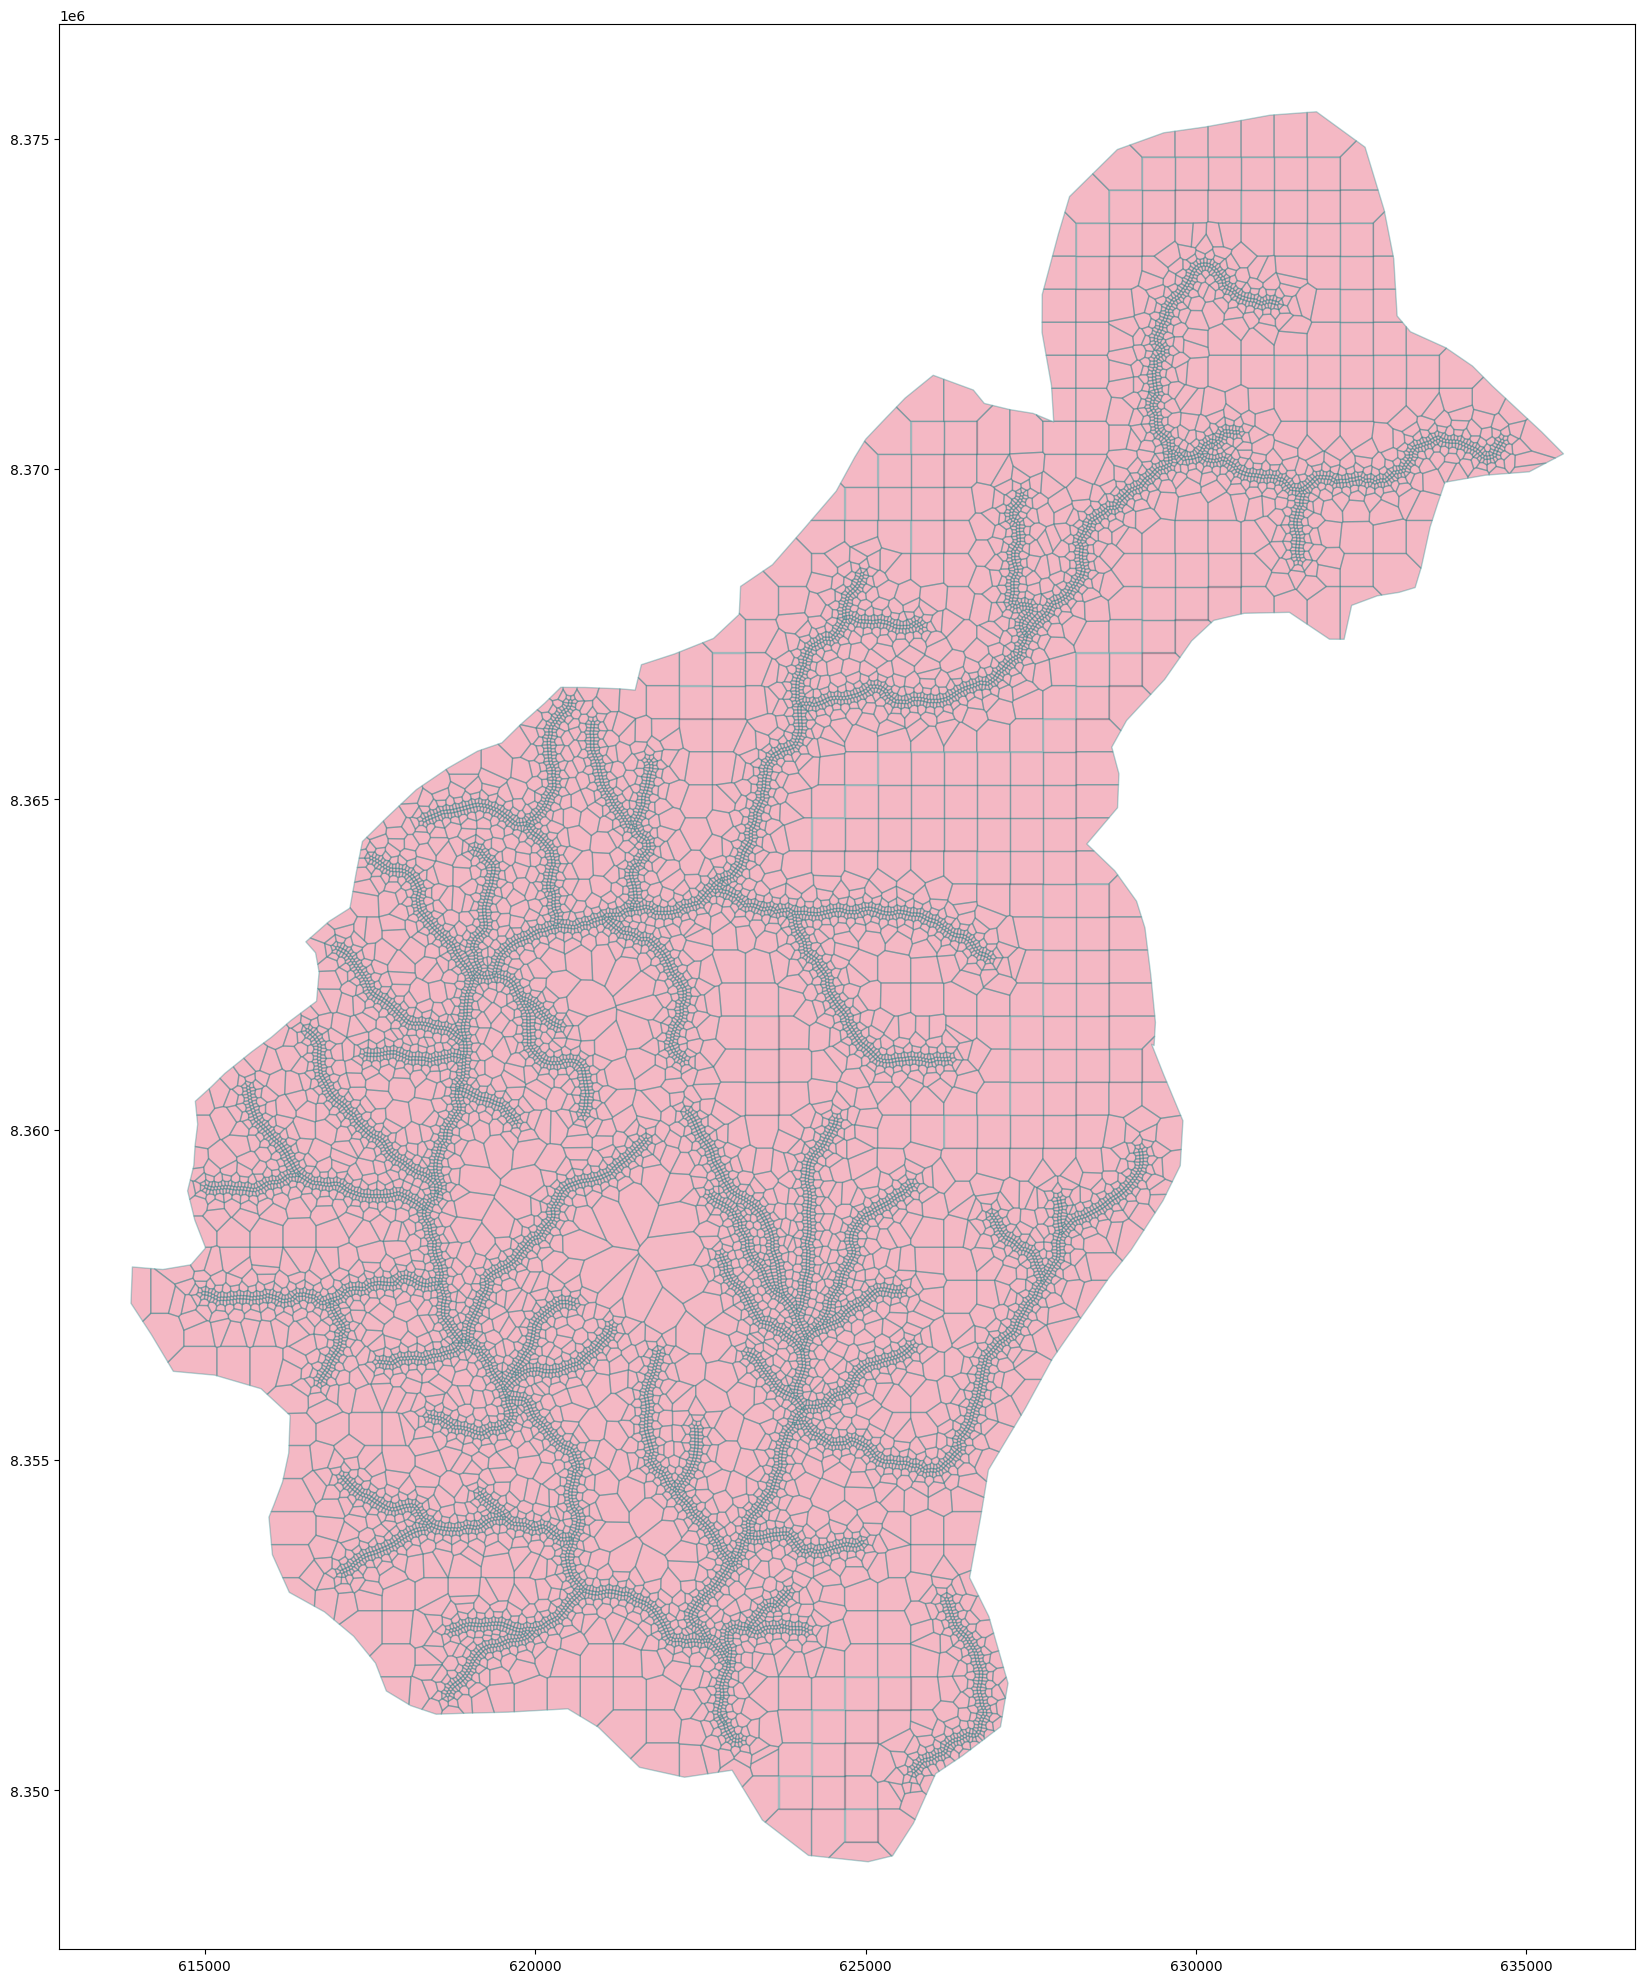

In [9]:
# Show the resulting voronoi mesh

#open the mesh file
mesh=gpd.read_file(outPath+'/'+vorMesh.modelDis['meshName']+'.shp')
#plot the mesh
mesh.plot(figsize=(35,25), fc='crimson', alpha=0.3, ec='teal')

In [10]:
#check mesh generation
from mf6Voronoi.meshProperties import meshShape

In [11]:
# open the mesh file
mesh=meshShape(outPath+'/'+vorMesh.modelDis['meshName']+'.shp')

In [12]:
# get the list of vertices and cell2d data
gridprops=mesh.get_gridprops_disv()


Creating a unique list of vertices [[x1,y1],[x2,y2],...]


 43%|████▎     | 6285/14714 [00:00<00:00, 29055.09it/s]

100%|██████████| 14714/14714 [00:00<00:00, 28513.00it/s]



Extracting cell2d data and grid index


100%|██████████| 14714/14714 [00:01<00:00, 7530.33it/s]


In [13]:
cell2d = gridprops['cell2d']           #cellid, cell centroid xy, vertex number and vertex id list
vertices = gridprops['vertices']       #vertex id and xy coordinates
ncpl = gridprops['ncpl']               #number of cells per layer
nvert = gridprops['nvert']             #number of verts
centroids=gridprops['centroids']  

In [14]:
#check or create an output folder
jsonPath = (outPath+'/'+vorMesh.modelDis['meshName'])
if os.path.isdir(jsonPath):
    print('The output folder %s exists'%jsonPath)
else:
    os.mkdir(jsonPath)
    print('The output folder %s has been generated.'%jsonPath)
    
mesh.save_properties(os.path.join(jsonPath,'disvDict.json'))

The output folder output/regionalModel has been generated.
